In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
employee_df = pd.read_csv("jobs_in_data.csv")
employee_df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [7]:
employee_df.shape

(9355, 12)

In [8]:
employee_df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

## Разведочный анализ данных ##

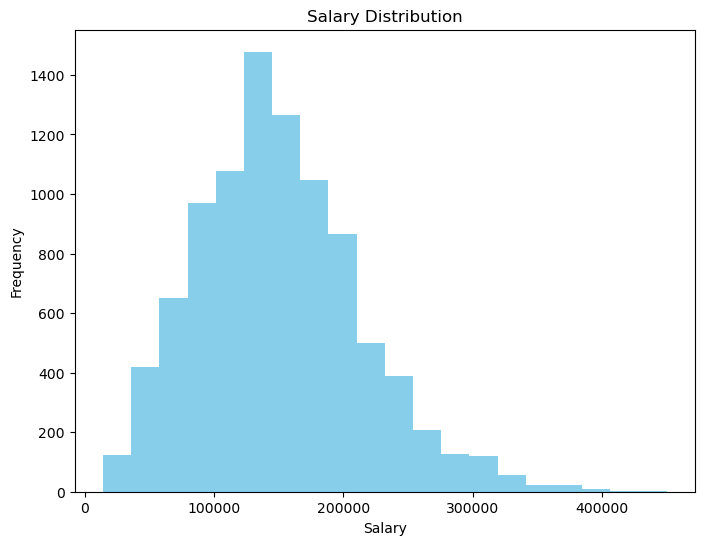

In [9]:
# Plotting histogram of salary column
plt.figure(figsize=(8, 6))
plt.hist(employee_df['salary'], bins=20, color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

In [10]:
# Count of unique job categories and their distribution
job_category_counts = employee_df['job_category'].value_counts()
print("Unique job categories:", len(job_category_counts))
print(job_category_counts)

Unique job categories: 10
job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64


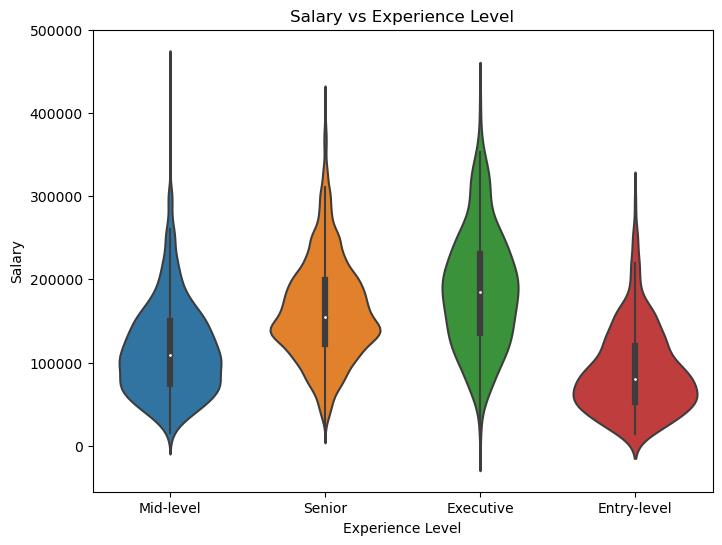

In [11]:
# Violin plot to visualize relationship between salary and experience_level
plt.figure(figsize=(8, 6))
sns.violinplot(data=employee_df, x='experience_level', y='salary')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Salary vs Experience Level')
plt.show()

In [12]:
# Count missing values in each column
missing_values = employee_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [13]:
# Count of employees in each company location
location_counts = employee_df['company_location'].value_counts()
print("Employees per company location:")
print(location_counts)

Employees per company location:
company_location
United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: count, Length: 70, dtype: int64


In [14]:
# Calculate average salary by job title
avg_salary_by_title = employee_df.groupby('job_title')['salary'].mean().sort_values(ascending=False)
print("Average salary by job title:")
print(avg_salary_by_title)

Average salary by job title:
job_title
Data Science Tech Lead            375000.0
Analytics Engineering Manager     325000.0
Managing Director Data Science    300000.0
Head of Machine Learning          259000.0
AWS Data Architect                258000.0
                                    ...   
Data Management Analyst            56000.0
Data Operations Specialist         55355.0
Machine Learning Specialist        55000.0
Compliance Data Analyst            45000.0
Insight Analyst                    40125.0
Name: salary, Length: 125, dtype: float64


In [15]:
# Count of employees in each company size category
company_size_counts = employee_df['company_size'].value_counts()
print("Employees per company size category:")
print(company_size_counts)

Employees per company size category:
company_size
M    8448
L     748
S     159
Name: count, dtype: int64


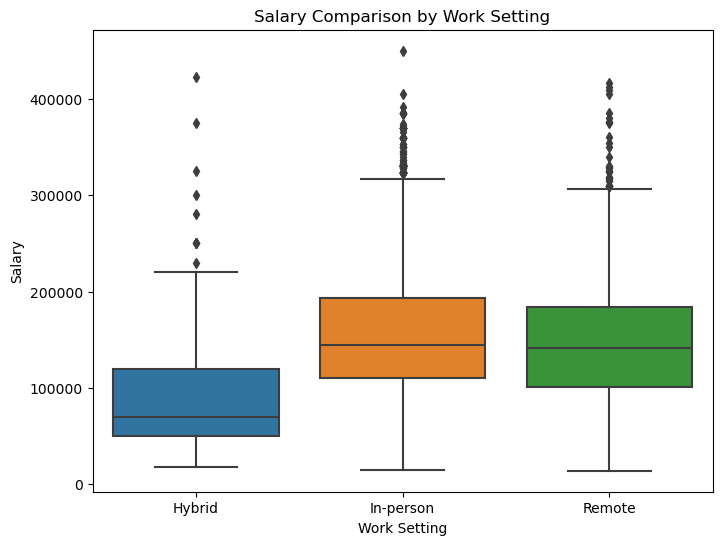

In [16]:
# Boxplot to compare salary distribution between remote and office work settings
plt.figure(figsize=(8, 6))
sns.boxplot(data=employee_df, x='work_setting', y='salary')
plt.xlabel('Work Setting')
plt.ylabel('Salary')
plt.title('Salary Comparison by Work Setting')
plt.show()

In [17]:
# Cross-tabulation of job categories and employment types
job_category_employment = pd.crosstab(employee_df['job_category'], employee_df['employment_type'])
print("Job categories by employment type:")
print(job_category_employment)

Job categories by employment type:
employment_type                 Contract  Freelance  Full-time  Part-time
job_category                                                             
BI and Visualization                   0          0        313          0
Cloud and Database                     0          0          5          0
Data Analysis                          7          1       1444          5
Data Architecture and Modeling         0          0        259          0
Data Engineering                       1          2       2255          2
Data Management and Strategy           0          0         61          0
Data Quality and Operations            0          0         55          0
Data Science and Research              2          2       3005          5
Leadership and Management              0          1        502          0
Machine Learning and AI                9          5       1411          3


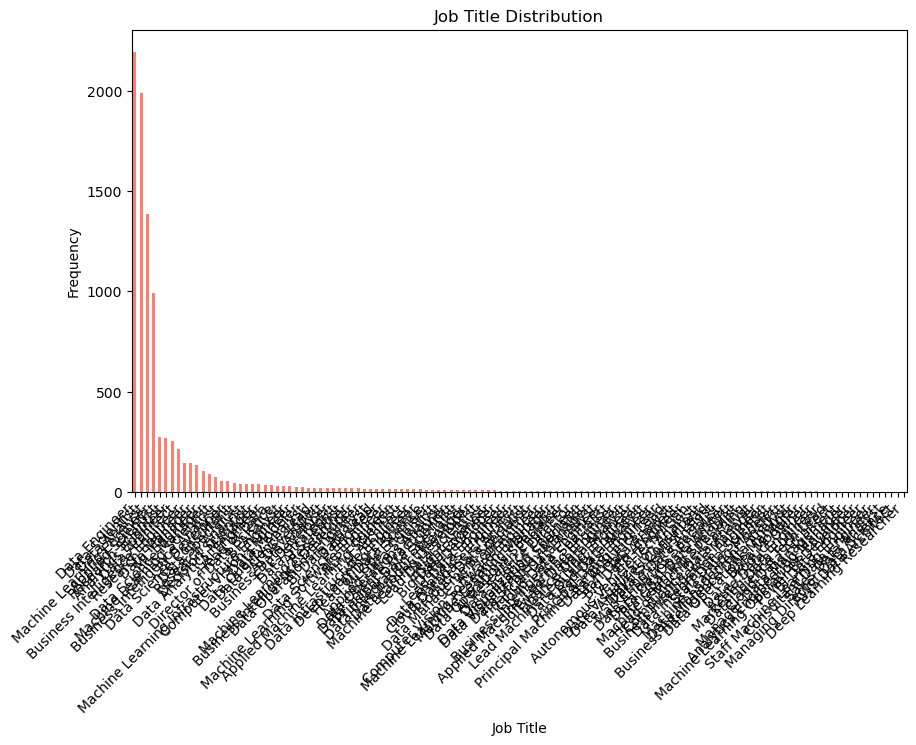

In [18]:
# Plotting a bar chart for job title distribution
plt.figure(figsize=(10, 6))
job_title_distribution = employee_df['job_title'].value_counts()
job_title_distribution.plot(kind='bar', color='salmon')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title('Job Title Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

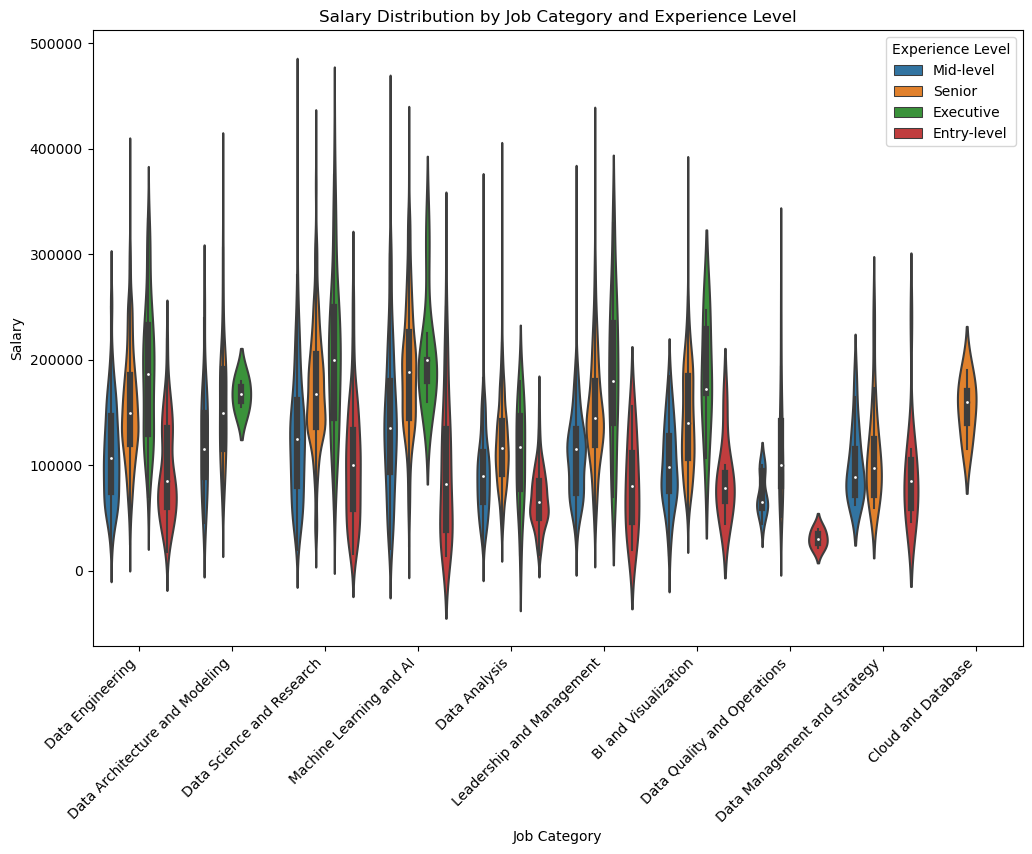

In [19]:
# Violin plot to visualize the relationship between experience level, job category, and salary
plt.figure(figsize=(12, 8))
sns.violinplot(data=employee_df, x='job_category', y='salary', hue='experience_level')
plt.xlabel('Job Category')
plt.ylabel('Salary')
plt.title('Salary Distribution by Job Category and Experience Level')
plt.legend(title='Experience Level')
plt.xticks(rotation=45, ha='right')
plt.show()

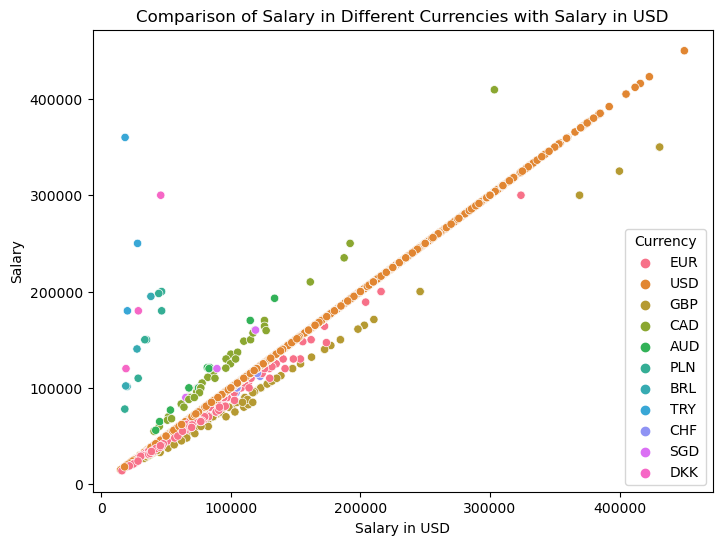

In [20]:
# Scatter plot to compare salary in different currencies with salary in USD
plt.figure(figsize=(8, 6))
sns.scatterplot(data=employee_df, x='salary_in_usd', y='salary', hue='salary_currency')
plt.xlabel('Salary in USD')
plt.ylabel('Salary')
plt.title('Comparison of Salary in Different Currencies with Salary in USD')
plt.legend(title='Currency')
plt.show()

In [21]:
# Crosstabulation of employee residence and company location
residence_location_crosstab = pd.crosstab(employee_df['employee_residence'], employee_df['company_location'])
print("Employee residence vs. Company location:")
print(residence_location_crosstab)

Employee residence vs. Company location:
company_location      Algeria  American Samoa  Andorra  Argentina  Armenia  \
employee_residence                                                           
Algeria                     1               0        0          0        0   
American Samoa              0               0        0          0        0   
Andorra                     0               0        1          0        0   
Argentina                   0               0        0          5        0   
Armenia                     0               0        0          0        1   
...                       ...             ...      ...        ...      ...   
United Arab Emirates        0               0        0          0        0   
United Kingdom              0               0        0          0        0   
United States               0               0        0          0        0   
Uzbekistan                  0               0        0          0        0   
Vietnam                

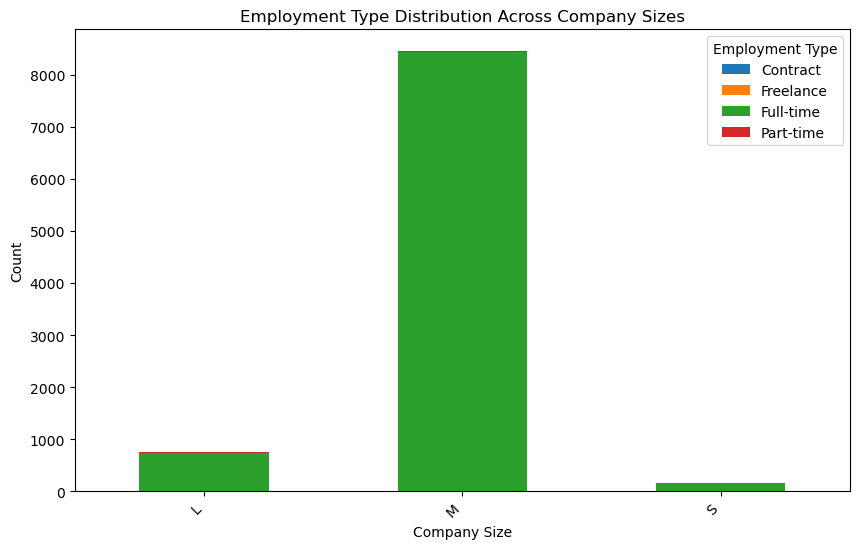

In [22]:
# Stacked bar chart to analyze employment type across company sizes
company_size_employment_type = pd.crosstab(employee_df['company_size'], employee_df['employment_type'])
company_size_employment_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.title('Employment Type Distribution Across Company Sizes')
plt.legend(title='Employment Type')
plt.xticks(rotation=45, ha='right')
plt.show()